<a href="https://colab.research.google.com/github/GENTLEW1ND/LearningGenAi/blob/main/Text_to_image_generation_with_LLM_with_hugging_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Diffusers is a hugging face page for using diffusion models from hugginggace hub
!pip install diffusers transformers accelerate

In [3]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

In [4]:
!pip show torch

Name: torch
Version: 2.8.0+cu126
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.12/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-cufile-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, setuptools, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchdata, torchvision


In [6]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model_id1, dtype=torch.float16, use_safetensors=True)
pipe = pipe.to("cuda")

Keyword arguments {'dtype': torch.float16} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [11]:
prompt="""A 3D-rendered futuristic cityscape at dusk, with neon-lit skyscrapers, flying cars, and a reflective river running through, vibrant colors, cyberpunk aesthetic, high detail."""

In [12]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]: A 3D-rendered futuristic cityscape at dusk, with neon-lit skyscrapers, flying cars, and a reflective river running through, vibrant colors, cyberpunk aesthetic, high detail.


(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

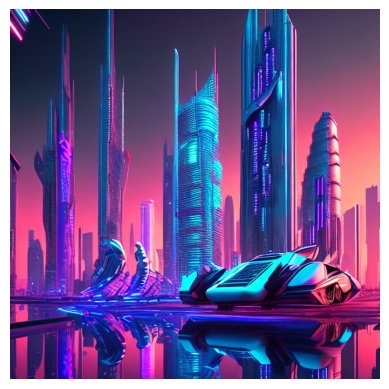

In [13]:
print("[PROMPT]:", prompt)
plt.imshow(image);
plt.axis('off')

## Workng with Stable Diffusion parameters

Negative prompting

num_inference_steps

height

weight

num_images_per_prompt

In [15]:
def generate_image(pipe, prompt, params):
  img = pipe(prompt, **params).images

  num_images = len(img)
  if num_images>1:
    fig, ax = plt.subplots(nrows=1, ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i])
      ax[i].axis('off')

  else:
    fig = plt.figure()
    plt.imshow(img[0])
    plt.axis('off')
  plt.tight_layout()

In [16]:
prompt="""A 3D-rendered futuristic cityscape at dusk, with neon-lit skyscrapers, flying cars, and a reflective river running through, vibrant colors, cyberpunk aesthetic, high detail."""

params={}

  0%|          | 0/50 [00:00<?, ?it/s]

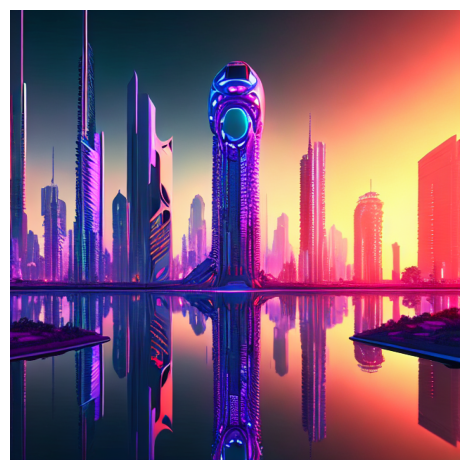

In [18]:
generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

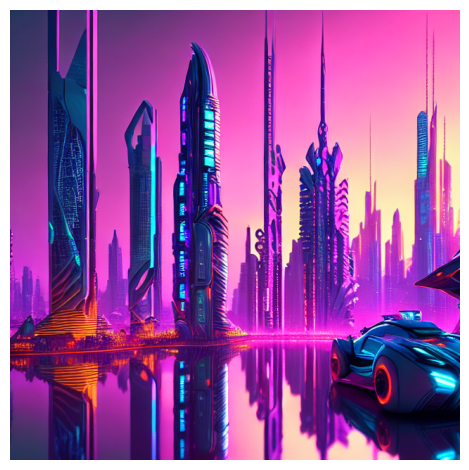

In [19]:
# num inference steps
params = {'num_inference_steps': 100}

generate_image(pipe, prompt, params)